In [1]:
using Pkg
Pkg.activate(".")
Pkg.add(["GaussianMixtures", "Distributions", "Random", "KernelDensity", "StatsPlots"])

  Activating project at `~/local_Documents/MLandDeepStudy/src`
    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `~/local_Documents/MLandDeepStudy/src/Project.toml`
  No Changes to `~/local_Documents/MLandDeepStudy/src/Manifest.toml`


In [2]:
using GaussianMixtures, Distributions, Random, KernelDensity, StatsPlots

ランダムデータの作成。2つの異なる正規分布からのサンプルを組み合わせる＝混合分布モデル。

In [3]:
x1, x2 = rand(Normal(-1, 1.0), 1_000), rand(Normal(1.0, 0.8), 1_000)

([-1.6426234099518806, -2.049664775177929, -1.0765789318995833, -0.2541794538387089, -0.977427261029891, 0.564661510904853, -3.2384101612390146, -2.9585827859728253, -1.8664205399239622, -1.0011349282139608  …  -2.122944942028667, -2.5040784321871, -1.6695704226045078, -1.6749374801036279, -1.0083281863332434, -3.1128819459882338, 0.204647275838719, -2.1109092425375175, -3.127071110022877, -1.7733865627048648], [0.3380957604884405, 1.7043323511982782, 1.477452428634142, 2.4919444093115466, 2.1038516105861707, 0.2856947545055051, 1.1454830421064388, 0.5950622371350105, 0.21502868084156845, -0.053413361449173635  …  1.0529497511220032, 0.6075448714474725, 0.06957218514362573, 0.9118443780148631, -0.7278763862807054, 0.563298962674053, -0.06813380422153226, 1.1455683484211283, 0.4015703930992012, -0.191960833229194])

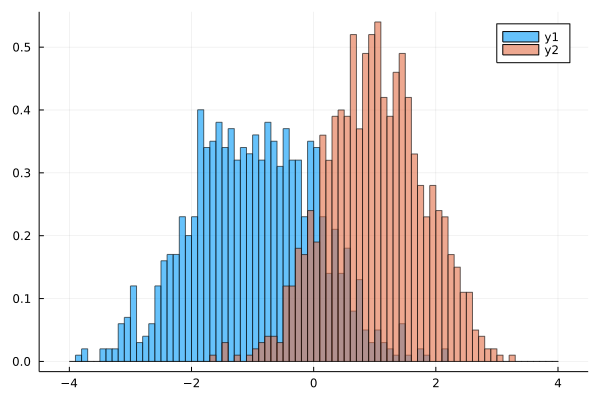

In [4]:
bins = -4:0.1:4
histogram(x1, alpha = 0.6, bins = bins, normalize = true)
histogram!(x2, alpha = 0.6, bins = bins, normalize = true)

In [5]:
x = vcat(x1, x2)

2000-element Vector{Float64}:
 -1.6426234099518806
 -2.049664775177929
 -1.0765789318995833
 -0.2541794538387089
 -0.977427261029891
  0.564661510904853
 -3.2384101612390146
 -2.9585827859728253
 -1.8664205399239622
 -1.0011349282139608
  0.6205079788917482
  0.17879350375783565
 -1.9739042921282155
  ⋮
 -0.3728510658563844
 -1.6451840232571744
  1.0529497511220032
  0.6075448714474725
  0.06957218514362573
  0.9118443780148631
 -0.7278763862807054
  0.563298962674053
 -0.06813380422153226
  1.1455683484211283
  0.4015703930992012
 -0.191960833229194

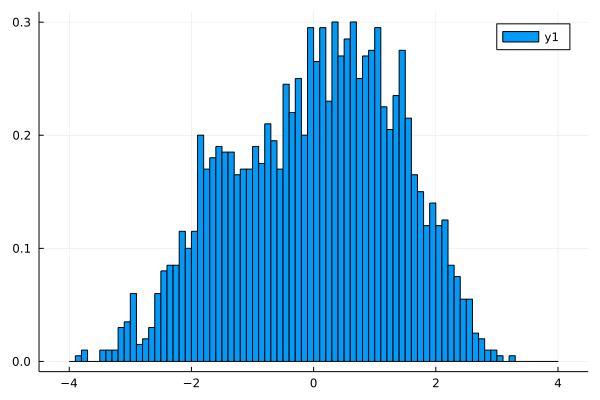

In [6]:
histogram(x, bins = bins, normalize = true)

最尤推定法でデータから，2つの正規分布のパラメタと混合比率（真の混合比率は0.5）を推定する。

In [7]:
gm_fit = GMM(2, x)

K-means converged with 9 iterations (objv = 1100.94304231755)


┌ Info: Initializing GMM, 2 Gaussians diag covariance 1 dimensions using 2000 data points
└ @ GaussianMixtures /Users/takuizum/.julia/packages/GaussianMixtures/LQCWm/src/train.jl:79
┌ Info: K-means with 2000 data points using 9 iterations
│ 500.0 data points per parameter
└ @ GaussianMixtures /Users/takuizum/.julia/packages/GaussianMixtures/LQCWm/src/train.jl:140


GMM{Float64} with 2 components in 1 dimensions and diag covariance
Mix 1: weight 0.586984
  mean: [0.8662293866427766]
  variance: [0.7136808150151617]
Mix 2: weight 0.413016
  mean: [-1.1972578789532]
  variance: [0.8533342849402175]


In [8]:
history(gm_fit)

GMM trained from 水  2/16 17:37:45 2022 to 水  2/16 17:37:50 2022
 0.000	Initializing GMM, 2 Gaussians diag covariance 1 dimensions using 2000 data points
 2.776	K-means with 2000 data points using 9 iterations
      	500.0 data points per parameter
 5.220	iteration 1, average log likelihood -1.703682
 5.220	iteration 2, average log likelihood -1.690181
 5.220	iteration 3, average log likelihood -1.687559
 5.220	iteration 4, average log likelihood -1.686787
 5.221	iteration 5, average log likelihood -1.686516
 5.221	iteration 6, average log likelihood -1.686411
 5.221	iteration 7, average log likelihood -1.686368
 5.221	iteration 8, average log likelihood -1.686350
 5.221	iteration 9, average log likelihood -1.686342
 5.221	iteration 10, average log likelihood -1.686338
 5.333	EM with 2000 data points 10 iterations avll -1.686338
      	400.0 data points per parameter


カーネル密度推定（ノンパラメトリックモデル）を当てはめてみる。

In [9]:
kd_fit = kde(x)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}(-5.328020174958946:0.004711976666785168:4.3173960619502925, [5.025836017635843e-7, 5.038276033597633e-7, 5.075108974184062e-7, 5.136431406732589e-7, 5.222426733147989e-7, 5.33336532923534e-7, 5.469604857227806e-7, 5.631590751509208e-7, 5.819856880306951e-7, 6.035026377804176e-7  …  6.28451721025082e-7, 6.038971991882691e-7, 5.821729141793422e-7, 5.63198449217428e-7, 5.469029377702661e-7, 5.332248923491448e-7, 5.221120529764686e-7, 5.135212541116513e-7, 5.074183109981048e-7, 5.037779239472698e-7])

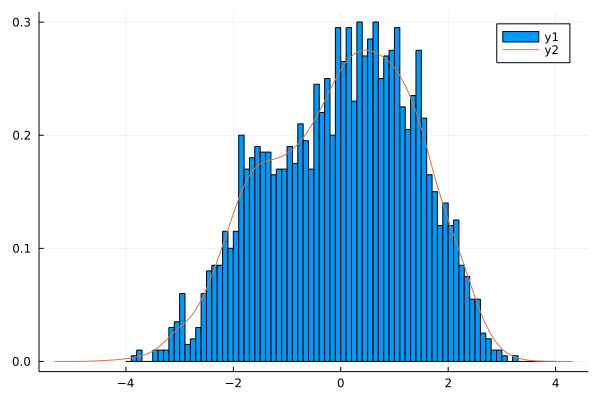

In [10]:
plot!(kd_fit)

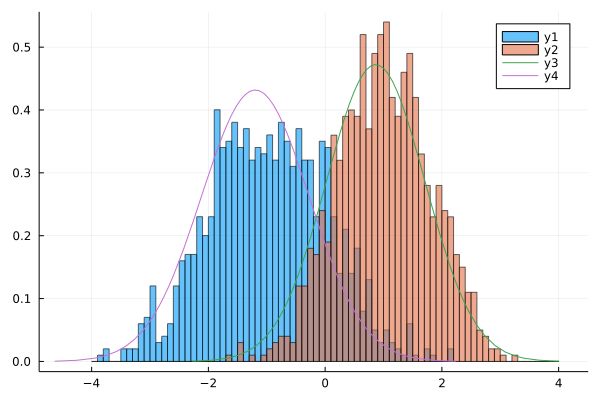

In [13]:
histogram(x1, alpha = 0.6, bins = bins, normalize = true)
histogram!(x2, alpha = 0.6, bins = bins, normalize = true)
plot!(MixtureModel(gm_fit))